In [1]:
import random 
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt 
import nltk

In [2]:
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\camur\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print("Length of the postive tweets:", len(positive_tweets))
print("Length of the negative tweets:", len(negative_tweets))

print("Type of the positive tweets:", type(positive_tweets))
print("Type of the negative tweets:", type(negative_tweets))

Length of the postive tweets: 5000
Length of the negative tweets: 5000
Type of the positive tweets: <class 'list'>
Type of the negative tweets: <class 'list'>


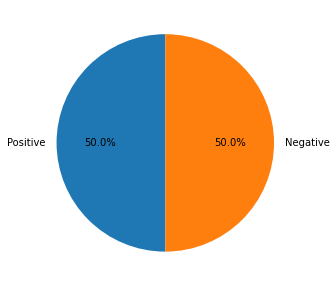

In [5]:
plt.figure(figsize = (5,5))
plt.pie(x = [len(positive_tweets), len(negative_tweets)], labels = ["Positive", "Negative"],
       startangle= 90, autopct='%1.1f%%') ;

In [7]:
import numpy as np 
print("A sample for positive tweets:\n",positive_tweets[np.random.randint(0,5000)])
print("\n")
print("A sample for negative tweets:\n",negative_tweets[np.random.randint(0,5000)])

A sample for positive tweets:
 @shree42007 thanks! You're very kind but good looks with no power kinda meaningless, no? :)


A sample for negative tweets:
 Was so exited to get a maccies breakfast but no I was 10 minutes late and had to get a burger and cheese bites :(


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\camur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [10]:
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


## Tweet Clean Helpers

In [11]:
#remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

#remove only hashtags
tweet2 = re.sub(r'#', repl = "", string = tweet2)

In [12]:
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

## Tokenizing Tweets

In [13]:
tokenized_tweet = TweetTokenizer().tokenize(tweet2)
print(tokenized_tweet)

['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', 'off', '…']


## English Stopwords

In [14]:
import string
print(len(stopwords.words("english")))
print(string.punctuation)

179
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
stopwords_english = stopwords.words('english')

In [21]:
#short way to remove punctuations and stopwords in python
clean_tweets = []
for word in tokenized_tweet:
    if word not in stopwords_english and word not in string.punctuation:
        clean_tweets.append(word)

## Visualizing Word Frequencies